In [9]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [10]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('RELIANCE.csv')
df


Date  Open Price  High Price  Low Price  Close Price  \
0      21-April-2022    18150.00    18572.95   17772.90     18205.80   
1      20-April-2022    18100.10    18415.00   18017.15     18313.70   
2      19-April-2022    18470.05    18718.00   17845.60     17943.15   
3      18-April-2022    18294.50    18684.50   18294.50     18549.85   
4      13-April-2022    18371.20    18549.30   18248.25     18343.90   
...              ...         ...         ...        ...          ...   
2548  6-January-2012     4114.00     4160.00    4076.00      4143.25   
2549  5-January-2012     4118.00     4126.90    4080.00      4101.85   
2550  4-January-2012     4100.00     4125.00    4081.40      4120.60   
2551  3-January-2012     4061.00     4110.10    4060.10      4095.35   
2552  2-January-2012     4139.90     4139.90    4044.00      4070.35   

               WAP  No.of Shares  No. of Trades  Total Turnover (Rs.)  \
0     18130.183442          4590           1770            83217542.0   
1     18295.559071          6069           1321           111035748.0   
2     18355.093320          2904            716            53303191.0   
3     18511.224599          1496            586            27692792.0   
4     18388.967826          1150            550            21147313.0   
...            ...           ...            ...                   ...   
2548   4129.486321          3107            444            12830314.0   
2549   4106.848723          1018            270             4180772.0   
2550   4105.106055          2857            247            11728288.0   
2551   4091.474315          5003            886            20469646.0   
2552   4085.640979          7760           1132            31704574.0   

      Deliverable Quantity  % Deli. Qty to Traded Qty  Spread High-Low  \
0                    950.0                      20.70           800.05   
1                   4677.0                      77.06           397.85   
2                   1619.0                      55.75           872.40   
3                    557.0                      37.23           390.00   
4                    573.0                      49.83           301.05   
...                    ...                        ...              ...   
2548                2069.0                      66.59            84.00   
2549                 357.0                      35.07            46.90   
2550                2312.0                      80.92            43.60   
2551                2817.0                      56.31            50.00   
2552                5776.0                      74.43            95.90   

      Spread Close-Open  
0                 55.80  
1                213.60  
2               -526.90  
3                255.35  
4                -27.30  
...                 ...  
2548              29.25  
2549             -16.15  
2550              20.60  
2551              34.35  
2552             -69.55  

[2553 rows x 13 columns]

In [11]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df


Open Price  High Price  Low Price  Close Price           WAP  \
Date                                                                       
2022-04-21    18150.00    18572.95   17772.90     18205.80  18130.183442   
2022-04-20    18100.10    18415.00   18017.15     18313.70  18295.559071   
2022-04-19    18470.05    18718.00   17845.60     17943.15  18355.093320   
2022-04-18    18294.50    18684.50   18294.50     18549.85  18511.224599   
2022-04-13    18371.20    18549.30   18248.25     18343.90  18388.967826   
...                ...         ...        ...          ...           ...   
2012-01-06     4114.00     4160.00    4076.00      4143.25   4129.486321   
2012-01-05     4118.00     4126.90    4080.00      4101.85   4106.848723   
2012-01-04     4100.00     4125.00    4081.40      4120.60   4105.106055   
2012-01-03     4061.00     4110.10    4060.10      4095.35   4091.474315   
2012-01-02     4139.90     4139.90    4044.00      4070.35   4085.640979   

            No.of Shares  No. of Trades  Total Turnover (Rs.)  \
Date                                                            
2022-04-21          4590           1770            83217542.0   
2022-04-20          6069           1321           111035748.0   
2022-04-19          2904            716            53303191.0   
2022-04-18          1496            586            27692792.0   
2022-04-13          1150            550            21147313.0   
...                  ...            ...                   ...   
2012-01-06          3107            444            12830314.0   
2012-01-05          1018            270             4180772.0   
2012-01-04          2857            247            11728288.0   
2012-01-03          5003            886            20469646.0   
2012-01-02          7760           1132            31704574.0   

            Deliverable Quantity  % Deli. Qty to Traded Qty  Spread High-Low  \
Date                                                                           
2022-04-21                 950.0                      20.70           800.05   
2022-04-20                4677.0                      77.06           397.85   
2022-04-19                1619.0                      55.75           872.40   
2022-04-18                 557.0                      37.23           390.00   
2022-04-13                 573.0                      49.83           301.05   
...                          ...                        ...              ...   
2012-01-06                2069.0                      66.59            84.00   
2012-01-05                 357.0                      35.07            46.90   
2012-01-04                2312.0                      80.92            43.60   
2012-01-03                2817.0                      56.31            50.00   
2012-01-02                5776.0                      74.43            95.90   

            Spread Close-Open  
Date                           
2022-04-21              55.80  
2022-04-20             213.60  
2022-04-19            -526.90  
2022-04-18             255.35  
2022-04-13             -27.30  
...                       ...  
2012-01-06              29.25  
2012-01-05             -16.15  
2012-01-04              20.60  
2012-01-03              34.35  
2012-01-02             -69.55  

[2553 rows x 12 columns]

In [14]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()


AttributeError: 'DataFrame' object has no attribute 'Close'

In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0])

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]


In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [ ]:
Y_pred = cls.predict(X_test)
score = accuracy_score(y_test, Y_pred)  
score

0.46

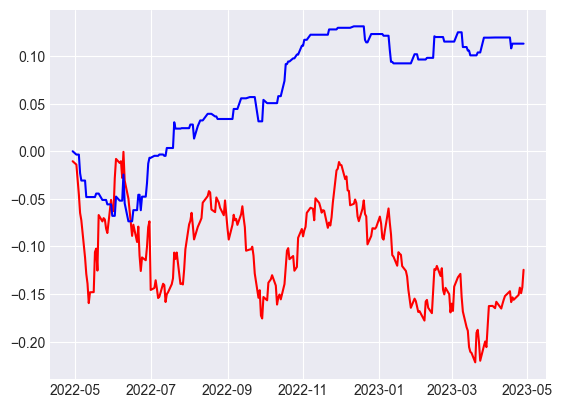

In [ ]:
df['Predicted_Signal'] = cls.predict(X)
# Calculate daily returns
df['Return'] = df.Close.pct_change()
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')